**by Putri Adistia Ramadhani - 2602569716**

# **Tourism Destination Recommendation System in Indonesia Using a Hybrid Filtering Approach**
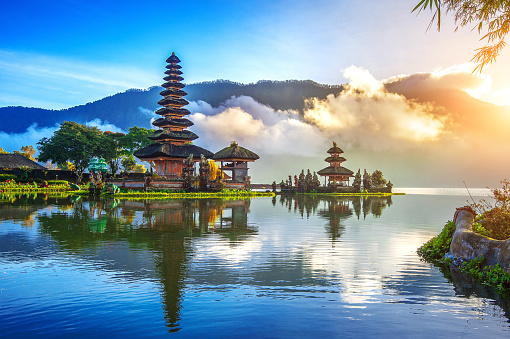

Indonesia is a country with more than 17,000 islands, each offering its own unique charm—from pristine beaches and towering mountains to historical sites and modern attractions. While this diversity is a gift, it can also make choosing a destination overwhelming. Travelers often find themselves unsure about where to go, especially when information is scattered across various sources with inconsistent details. The challenge of making a confident decision is real, and it affects both domestic and international visitors alike.

In response to this, personalized recommendation systems have grown in popularity. Across industries, these systems have helped people make decisions faster by suggesting options that align with their individual interests. In tourism, however, many platforms in Indonesia still rely on generic recommendations. These systems often overlook important factors, such as past travel experiences, user preferences, and the evolving nature of tourist attractions.

This project introduces the "Tourism Destination Recommendation System in Indonesia Using a Hybrid Filtering Approach" to address these issues. By applying Content-Based Filtering and Collaborative Filtering, the system aims to offer more relevant suggestions. The content-based method will compare destination descriptions and categories, while the collaborative approach will analyze patterns in user ratings. Through this dual strategy, the system hopes to provide recommendations that feel more intuitive and useful to users.

To assess its effectiveness, the model will be evaluated using the Precision@5 metric. This will help ensure that the top five recommendations are genuinely useful for travelers. Ultimately, the goal is simple: to make the experience of choosing a travel destination in Indonesia more straightforward and enjoyable.


## **[1] Exploratory Data Analysis (EDA)**

Dataset:

The project utilizes public tourism data from Kaggle, which includes information about tourist destinations, user interactions, and ratings across Indonesia.

Kaggle : 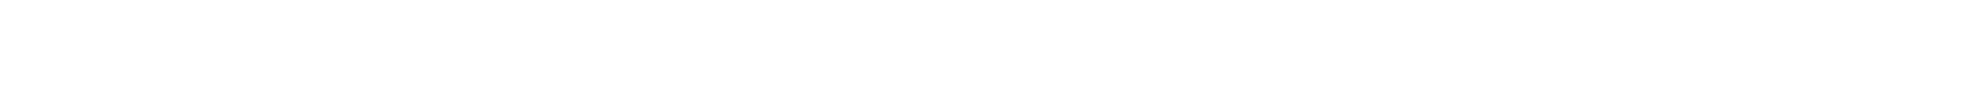

### **Data Understanding**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
tourism_df = pd.read_csv('/content/drive/MyDrive/PutriAdistiaRamadhani_2602569716_RecommendedSystem/data/tourism_with_id.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/PutriAdistiaRamadhani_2602569716_RecommendedSystem/data/tourism_rating.csv')

In [3]:
# Display dataset structure
print("=== Tourism Dataset Overview ===")
print(tourism_df.info())
print("\n=== Rating Dataset Overview ===")
print(rating_df.info())

=== Tourism Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB
None

=== Rating Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Colu

In [4]:
# Preview the first few rows
tourism_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# Preview the first few rows
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [6]:
# Identify missing values
print("\n=== Missing Values in Tourism Data ===")
print(tourism_df.isnull().sum())
print("\n=== Missing Values in Rating Data ===")
print(rating_df.isnull().sum())


=== Missing Values in Tourism Data ===
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

=== Missing Values in Rating Data ===
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


In [7]:
# Calculate the percentage of missing values
missing_percentage = (tourism_df.isnull().sum() / len(tourism_df)) * 100
print("=== Missing Values Percentage in Tourism Data ===")
print(missing_percentage[missing_percentage > 0])

=== Missing Values Percentage in Tourism Data ===
Time_Minutes     53.089245
Unnamed: 11     100.000000
dtype: float64


**Tourism Dataset Overview**

Number of Entries: 437 rows

Columns: 13 in total

**Key Features:**

* Place_Id (int64): Unique identifier for each tourist destination.
* Place_Name (object): Name of the tourist destination.
* Description (object): Text description of the destination
* Category (object): Category of the destination (e.g., cultural site, amusement park).
* City (object): The city where the destination is located.
* Price (int64): Entry fee in IDR.
* Rating (float64): User rating (scale 1 to 5).
* Time_Minutes (float64): Estimated time required to explore the destination (with many missing values).
* Coordinate, Lat, Long (object/float64): Location coordinates.
* Unnamed: 11 (float64): Empty column, likely irrelevant and safe to remove.
* Unnamed: 12 (int64): Unknown purpose, requires inspection.

**Observations:**

* The Description column is fully populated, which is essential for content-based filtering.
* Time_Minutes has only 205 non-null entries, indicating significant missing data.
* Unnamed: 11 is entirely empty and can be dropped without impact.
* Unnamed: 12 has full data but needs further inspection to determine relevance.


**Rating Dataset Overview**

Number of Entries: 10,000 rows

Columns: 3 in total

**Key Features:**

* User_Id (int64): Identifier for each user.
* Place_Id (int64): Identifier for the reviewed tourist destination.
* Place_Ratings (int64): Ratings given by users (scale 1 to 5).

**Observations:**

* All columns have complete data.
* The dataset is suitable for collaborative filtering due to the availability of user-item interactions.
* It's crucial to explore whether ratings are evenly distributed or concentrated among a few users/places.

### **Explore The Data**

=== Tourism Category Distribution ===
Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64


<ipython-input-8-376ea12dceb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=tourism_df, palette='viridis')


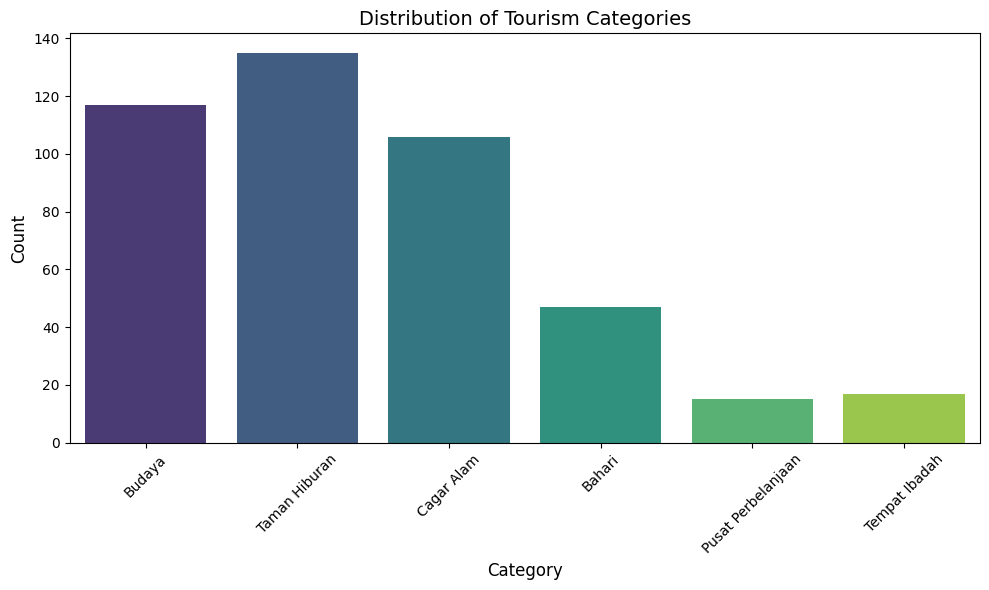

In [8]:
# Analyze category distribution
print("=== Tourism Category Distribution ===")
print(tourism_df['Category'].value_counts())

# Visualizatio of category distrubytuib
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=tourism_df, palette='viridis')
plt.title('Distribution of Tourism Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The category distribution indicates that Taman Hiburan (Amusement Parks), Budaya (Cultural Sites), and Cagar Alam (Nature Reserves) are the most frequently occurring categories. This suggests a strong focus on recreational, cultural, and nature-based tourism. Conversely, categories like Bahari (Marine Tourism), Pusat Perbelanjaan (Shopping Centers), and Tempat Ibadah (Places of Worship) are less represented. This imbalance may lead to a bias in content-based filtering, as recommendations might favor categories with higher representation.

=== Rating Distribution ===
Place_Ratings
4    2106
3    2096
2    2071
5    2021
1    1706
Name: count, dtype: int64


<ipython-input-9-39586e2d602e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Place_Ratings', data=rating_df, palette='magma')


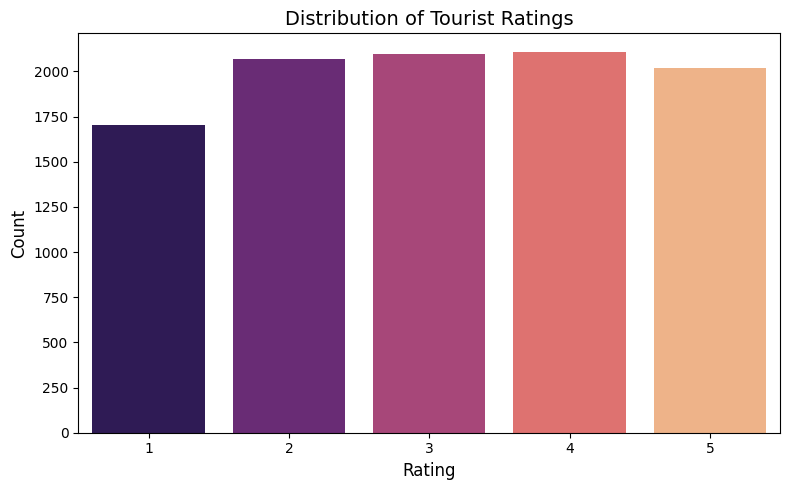

In [9]:
# Analyze rating distribution
print("=== Rating Distribution ===")
print(rating_df['Place_Ratings'].value_counts())

# Visualization of rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Place_Ratings', data=rating_df, palette='magma')
plt.title('Distribution of Tourist Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The rating distribution appears relatively balanced, with similar numbers of ratings across the 1 to 5 scale. There’s a slight tendency toward ratings 2, 3, and 4, but the variation suggests that users provided honest and diverse feedback rather than consistently giving high or low scores. This balance is a positive indicator for the collaborative filtering approach, as the model will have sufficient variation to identify user preferences accurately and make personalized recommendations that reflect genuine tourist experiences.

In [10]:
# Analyze rating frequency for places and users
rating_per_place = rating_df['Place_Id'].value_counts()
print("=== Top 10 Places with the Most Ratings ===")
print("{:<6} | {:<45} | {:<10}".format("Rank", "Place Name", "Ratings"))
print("-" * 65)
for rank, (place_id, count) in enumerate(rating_per_place.head(10).items(), start=1):
    place_name = tourism_df.loc[tourism_df['Place_Id'] == place_id, 'Place_Name'].values[0]
    print(f"{rank:<6} | {place_name:<45} | {count:<10}")

rating_per_user = rating_df['User_Id'].value_counts()
print("\n=== Top 10 Users with the Most Ratings ===")
print("{:<6} | {:<15}".format("User ID", "Ratings"))
print("-" * 20)
for user_id, count in rating_per_user.head(10).items():
    print(f"{user_id:<6} | {count:<15}")

=== Top 10 Places with the Most Ratings ===
Rank   | Place Name                                    | Ratings   
-----------------------------------------------------------------
1      | Pantai Parangtritis                           | 39        
2      | Gunung Lalakon                                | 39        
3      | Gereja Perawan Maria Tak Berdosa Surabaya     | 38        
4      | Pantai Kesirat                                | 37        
5      | Taman Sungai Mudal                            | 36        
6      | Geoforest Watu Payung Turunan                 | 34        
7      | Kampung Batu Malakasari                       | 34        
8      | Grand Maerakaca                               | 33        
9      | NuArt Sculpture Park                          | 33        
10     | Food Junction Grand Pakuwon                   | 33        

=== Top 10 Users with the Most Ratings ===
User ID | Ratings        
--------------------
267    | 53             
276    | 50             
1

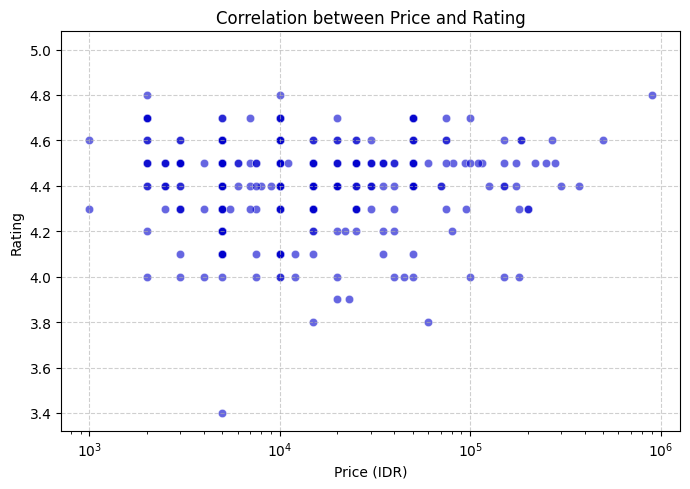

In [11]:
# Analyze correlation between Price and Rating
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Price', y='Rating', data=tourism_df, color='mediumblue', alpha=0.6)
plt.title('Correlation between Price and Rating')
plt.xlabel('Price (IDR)')
plt.ylabel('Rating')
plt.xscale('log')  # Apply log scale for better distribution
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Insights from the Scatterplot: Price vs Rating

The scatterplot reveals a **weak or negligible correlation** between **price** and **rating**. Most data points are clustered within a **rating range of 4.2 to 4.6**, regardless of the ticket price. Additionally, a majority of attractions are priced on the **lower end of the scale**, with very few high-priced destinations. This suggests that **price is not a major factor** in determining tourist satisfaction. For the recommendation model, this finding indicates that **`Price`** may contribute **little value** and could potentially be excluded to simplify the model without compromising performance.


## **[2] Data Preprocessing**

### Data Cleaning: Dropping Unnecessary Columns

During the data understanding phase, we identified three columns that need to be dropped:

1. **`Time_Minutes`:**  
   This column represents the estimated time required to explore each destination. However, more than **53% of its values are missing**, making it unreliable for building a robust recommendation system. Imputing such a large amount of missing data could introduce noise rather than useful insights. Since the system focuses on recommending places based on descriptions, categories, and user ratings, the `Time_Minutes` column is unnecessary.

2. **`Unnamed: 11`:**  
   This column contains **only null values** and provides no meaningful information. It appears to be an artifact from the dataset generation process and can be safely removed without impacting the analysis.

3. **`Unnamed: 12`:**  
   Upon inspection, this column contains a simple **sequential index** ranging from 1 to the last row. Since the `Place_Id` column already provides a unique identifier for each record, `Unnamed: 12` is redundant and irrelevant to the recommendation system.

By removing these columns, we ensure the dataset remains clean and focused on the essential information for developing an effective tourism recommendation model.

In [12]:
# Drop unnecessary columns
columns_to_drop = ['Time_Minutes','Unnamed: 11', 'Unnamed: 12']
tourism_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print("Unnecessary columns dropped successfully.")

Unnecessary columns dropped successfully.


In [13]:
tourism_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


### Text Cleaning

Text cleaning is a crucial preprocessing step to ensure that the **description data** used for the recommendation model is consistent, relevant, and free of noise. The goal is to transform raw text into a structured format that machine learning models can process effectively. In this step, several cleaning techniques are applied:


1. **Remove Non-Alphabetic Characters**  
   All characters except letters (a-z) and spaces are removed. The text is then converted to lowercase.

2. **Manual Tokenization**  
   The text is split into tokens (words) using space-based splitting.

3. **Stopword Removal**
   Stopwords in English (using `ENGLISH_STOP_WORDS` from `sklearn.feature_extraction.text`) and basic Indonesian stopwords such as *"dan"*, *"di"*, *"ke"*, etc., are removed.

4. **Remove Short Tokens**  
   Tokens with only a single character are excluded.

5. **Text Reconstruction**  
   The cleaned tokens are joined back into a single string.

These steps help improve the quality of the `Description` data, ensuring more accurate content-based recommendations.


In [14]:
import re
import numpy as np

# Text Cleaning
def preprocess_text_simple(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize manually by splitting on whitespace
    tokens = text.split()
    # Remove stopwords (English and basic Indonesian) and single-character tokens
    indonesian_stopwords = {
        'dan', 'di', 'ke', 'yang', 'adalah', 'ini', 'itu', 'sebagai', 'dalam',
        'juga', 'oleh', 'karena', 'mereka', 'kita', 'saya', 'anda', 'kamu', 'dia'
    }
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS and word not in indonesian_stopwords and len(word) > 1]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply Cleaning
tourism_df['Description'] = tourism_df['Description'].apply(lambda x: preprocess_text_simple(str(x)))

### Text Vectorization (TF-IDF)

The following code performs text preprocessing and feature extraction using the TF-IDF (Term Frequency-Inverse Document Frequency) technique to analyze the cleaned descriptions of tourism destinations in Indonesia. The vectorization is limited to unigrams with a maximum of 100 features and English stopwords removal to focus on the most relevant terms. The resulting TF-IDF matrix is converted into a DataFrame for further analysis, including inspecting the top 20 features and calculating the sparsity of the matrix.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization with Unigram Only
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Apply TF-IDF
tfidf_matrix = tfidf.fit_transform(tourism_df['Description'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Analyze the Results
print("=== TF-IDF Feature Matrix (First 5 Rows) ===")
print(tfidf_df.head())

# Calculate Non-zero Elements
non_zero_elements = tfidf_matrix.nnz
total_elements = tfidf_matrix.shape[0] * tfidf_matrix.shape[1]
non_zero_percentage = (non_zero_elements / total_elements) * 100
print(f"Non-zero elements: {non_zero_elements} out of {total_elements} ({non_zero_percentage:.2f}%)")

# Display Top 20 Features
print("Top 20 TF-IDF Features:", tfidf.get_feature_names_out()[:20])

# Show Sample Cleaned Descriptions
print("\n Sample Cleaned Descriptions:")
print(tourism_df[['Place_Name', 'Description']].sample(5))


=== TF-IDF Feature Matrix (First 5 Rows) ===
   ada       air      akan  alam      area  atas      atau  bagi  bahasa  \
0  0.0  0.000000  0.000000   0.0  0.000000   0.0  0.214929   0.0     0.0   
1  0.0  0.000000  0.000000   0.0  0.000000   0.0  0.175361   0.0     0.0   
2  0.0  0.000000  0.000000   0.0  0.000000   0.0  0.302766   0.0     0.0   
3  0.0  0.000000  0.000000   0.0  0.276366   0.0  0.192676   0.0     0.0   
4  0.0  0.456464  0.238149   0.0  0.000000   0.0  0.185073   0.0     0.0   

   bandung  ...  terdapat  terletak  tersebut  tidak     timur     untuk  \
0      0.0  ...   0.00000  0.103612       0.0    0.0  0.000000  0.265830   
1      0.0  ...   0.20608  0.000000       0.0    0.0  0.000000  0.000000   
2      0.0  ...   0.00000  0.291912       0.0    0.0  0.000000  0.000000   
3      0.0  ...   0.00000  0.185769       0.0    0.0  0.271477  0.000000   
4      0.0  ...   0.00000  0.000000       0.0    0.0  0.000000  0.152602   

     wisata  wisatawan     yaitu  yogyaka

The TF-IDF feature matrix reveals that the text data from tourism descriptions has been successfully transformed into numerical form, with 100 unigram features and 8,041 non-zero elements out of 43,700, indicating 18.40% matrix density. The most prominent words, such as "wisata" (tourism), "alam" (nature), and "budaya" (culture), reflect key aspects of Indonesian tourism, emphasizing natural attractions, cultural experiences, and water-based activities. Additionally, the appearance of location-specific terms like "bandung" and "yogyakarta" highlights the significance of these destinations. This TF-IDF representation provides valuable insights into destination characteristics, which can support the development of a hybrid filtering-based tourism recommendation system in Indonesia.

### Feature Engineering

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# One-Hot Encoding for Category and City
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(tourism_df[['Category', 'City']])

# FEATURE SCALING (Price)
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(tourism_df[['Price']])

# Combine with TF-IDF Matrix
X_combined = hstack([tfidf_matrix, encoded_categorical, scaled_numeric])

print(f"Shape final feature matrix: {X_combined.shape}")

Shape final feature matrix: (437, 112)


We use One-Hot Encoding to transform categorical features like Category and City into a numerical format that machine learning models can understand. This process creates new binary columns for each unique category or city, helping the model distinguish between different types of tourist attractions and locations. Additionally, we apply Standardization to the Price feature, scaling the values to have a mean of 0 and a standard deviation of 1. This ensures that the Price variable, which may have larger numerical values compared to other features, does not disproportionately influence the model's performance. Finally, we combine the TF-IDF matrix, the encoded categorical features, and the scaled numerical feature into a single feature matrix, giving the model a comprehensive view of the data for better predictions.

In [17]:
# Merge rating data with tourism information
merged_df = pd.merge(rating_df, tourism_df[['Place_Id', 'Place_Name', 'Description', 'Category', 'City']],
                     on='Place_Id', how='left')

# Calculate average rating per place
avg_rating = merged_df.groupby('Place_Id')['Place_Ratings'].mean().reset_index()
avg_rating.columns = ['Place_Id', 'Avg_Place_Rating']

# Merge with tourism dataset
tourism_df = pd.merge(tourism_df, avg_rating, on='Place_Id', how='left')

# Display sample data
print(tourism_df[['Place_Name', 'Avg_Place_Rating']].head())

                          Place_Name  Avg_Place_Rating
0                   Monumen Nasional          3.722222
1                           Kota Tua          2.840000
2                      Dunia Fantasi          2.526316
3  Taman Mini Indonesia Indah (TMII)          2.857143
4           Atlantis Water Adventure          3.520000


The merging process is essential to integrate the user ratings with relevant contextual information about the tourist places, such as the place name, description, category, and city. By combining these datasets, we can better understand the relationship between user preferences and place characteristics. This integration allows us to calculate the average place rating, which serves as a useful baseline for content-based recommendations. Moreover, the merged dataset provides richer features for the model, enabling it to learn patterns more effectively and generate more personalized and accurate recommendations.

## **[3] Data Modeling and Evaluation**

In [18]:
from sklearn.model_selection import train_test_split

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,  # Feature matrix combined (TF-IDF + Category + City + Price)
    tourism_df['Avg_Place_Rating'],  # Target: Average Place Rating
    test_size=0.2,               # 80% train, 20% test
    random_state=42,
    stratify=None                # Stratification isn't required for continuous values
)

# Show the dataset sizes
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Train set size: (349, 112), Test set size: (88, 112)


This code splits the combined feature matrix into training and testing sets. We use train_test_split to divide the data, ensuring that 80% is used for training and 20% for testing. The target variable is Avg_Place_Rating, which represents the average rating for each tourist destination. Since Avg_Place_Rating is a continuous variable, we set stratify=None because stratification is typically used for classification tasks with categorical targets. The resulting datasets, X_train, X_test, y_train, and y_test, will be used to train and evaluate the machine learning models.

In [20]:
from scipy.sparse.linalg import svds
import numpy as np

# Create user-item interaction matrix
user_item_matrix = rating_df.pivot_table(index='User_Id', columns='Place_Id', values='Place_Ratings').fillna(0)

# Apply Singular Value Decomposition (SVD)
U, sigma, Vt = svds(user_item_matrix.values, k=50)

# Convert singular values to diagonal matrix
sigma = np.diag(sigma)

# Compute predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Create DataFrame for predicted ratings
predicted_ratings_df = pd.DataFrame(predicted_ratings,
                                    index=user_item_matrix.index,
                                    columns=user_item_matrix.columns)

print(predicted_ratings_df.head())

Place_Id       1         2         3         4         5         6    \
User_Id                                                                
1         0.154389  0.227886 -0.157724  0.090195  2.758536  0.390352   
2         0.283162  1.502026  0.413212 -0.599499 -0.517382  0.123250   
3         0.275392  1.106227 -0.261196  0.866917  0.494370  0.026308   
4         0.680976  0.184049  0.075397  1.345077  2.320268 -0.425232   
5        -0.346474 -0.553251  0.257497  0.812306  0.417878 -0.081550   

Place_Id       7         8         9         10   ...       428       429  \
User_Id                                           ...                       
1        -0.241695  0.763399 -0.061163  0.101842  ...  1.882307 -0.274821   
2        -0.351410  0.201746 -0.332939 -0.168444  ...  0.091048  0.219287   
3         0.043063  0.238565  0.319534  0.341857  ...  0.036846 -0.410755   
4        -0.127470 -0.050282 -0.246284  0.538905  ...  0.244731  0.334994   
5         0.356694  0.584167  1.7

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors

# Step 1️⃣: Content-Based Filtering (CBF) with RandomForestRegressor
cbf_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
cbf_model.fit(X_train, y_train)
cbf_predictions = cbf_model.predict(X_test)

# Step 2️⃣: Collaborative Filtering (CF) using KNN
# Remove duplicates by aggregating with mean
rating_df_clean = rating_df.groupby(['User_Id', 'Place_Id'])['Place_Ratings'].mean().reset_index()

# Pivot the cleaned rating dataframe
user_item_matrix = rating_df_clean.pivot(index='User_Id', columns='Place_Id', values='Place_Ratings').fillna(0)

# Train KNN for user-based collaborative filtering
cf_model = NearestNeighbors(metric='cosine', algorithm='brute')
cf_model.fit(user_item_matrix.values)

# Generate predictions for CF
cf_predictions = []
for user_id in y_test.index:
    if user_id in user_item_matrix.index:
        user_idx = user_item_matrix.index.get_loc(user_id)
        distances, indices = cf_model.kneighbors(user_item_matrix.iloc[user_idx, :].values.reshape(1, -1), n_neighbors=5)

        # Calculate the mean rating of the neighbors for CF prediction
        neighbor_ratings = user_item_matrix.iloc[indices[0]].mean(axis=0).values
        cf_predictions.append(neighbor_ratings.mean())
    else:
        # Fallback to content-based prediction if user not found
        cf_predictions.append(cbf_predictions.mean())

cf_predictions = np.array(cf_predictions)

# Step 3️⃣: Calculate User Interaction Weighting
# Compute average ratings per user
user_interaction_weight = rating_df.groupby('User_Id')['Place_Ratings'].mean().to_dict()

# Apply user-based weighting to CF predictions
weighted_cf_predictions = []
for user_id, cf_pred in zip(y_test.index, cf_predictions):
    user_weight = user_interaction_weight.get(user_id, 1)  # Default to 1 if user not found
    weighted_cf_predictions.append(cf_pred * user_weight)

weighted_cf_predictions = np.array(weighted_cf_predictions)

# Step 4️⃣: Combine CBF & CF Predictions with Weighting (Hybrid)
alpha = 0.7  # Content-based filtering weight
hybrid_predictions = (alpha * cbf_predictions) + ((1 - alpha) * weighted_cf_predictions)

# Step 5️⃣: Calculate Precision@5
def precision_at_k(y_true, y_pred, k=5):
    """
    Calculate Precision@k for hybrid predictions.
    """
    y_pred_rounded = np.round(y_pred)
    hits = sum(y_true[i] in y_pred_rounded[i:i+k] for i in range(len(y_true)))
    return hits / (len(y_true) * k)

precision5 = precision_at_k(y_test.values, hybrid_predictions, k=5)

# Step 6️⃣: Evaluation Metrics
mae = mean_absolute_error(y_test, hybrid_predictions)
mse = mean_squared_error(y_test, hybrid_predictions)
r2 = r2_score(y_test, hybrid_predictions)

# Step 7️⃣: Print Results
print(f"Hybrid Model - Precision@5: {precision5:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Hybrid Model - Precision@5: 0.0114
Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.50
R-squared (R²): -3.58


### **Interpretation The Result**
The model's performance reveals significant limitations in its ability to provide accurate recommendations. With a Precision@5 of 0.0114, the model struggles to identify relevant tourist destinations within the top five predictions. This low precision indicates that users are unlikely to find the recommended places useful or appealing.

Additionally, the Mean Absolute Error (MAE) of 0.60 and the Mean Squared Error (MSE) of 0.50 suggest that the model's predictions deviate considerably from the actual ratings. The R-squared value (R²) of -3.58 further indicates that the model performs worse than a naive approach that uses the average rating as a prediction for all items.

This poor performance can be attributed to several factors. Firstly, the text representation using TF-IDF may have failed to capture the true semantic meaning of the descriptions, leading to less meaningful content-based filtering. Secondly, the user-item matrix might be too sparse, with limited interactions recorded for many users, making it difficult for collaborative filtering to generate reliable predictions. Lastly, the weighting scheme used to combine content-based and collaborative filtering results might not accurately reflect the true importance of each component.

To improve the model, it would be beneficial to explore alternative text representation techniques, such as word embeddings, and to experiment with different weighting strategies for the hybrid model. Additionally, gathering more user interaction data could enhance the collaborative filtering process, ultimately leading to better recommendations.

Top 5 Recommended Tourist Places (Highest Predictions):
                                Place_Name  Predicted_Rating
415                       Keraton Surabaya          3.571929
138  Puncak Gunung Api Purba - Nglanggeran          3.520327
51                            Kampung Cina          3.506140
321                            Bukit Jamur          3.495854
253                 Teras Cikapundung BBWS          3.484841


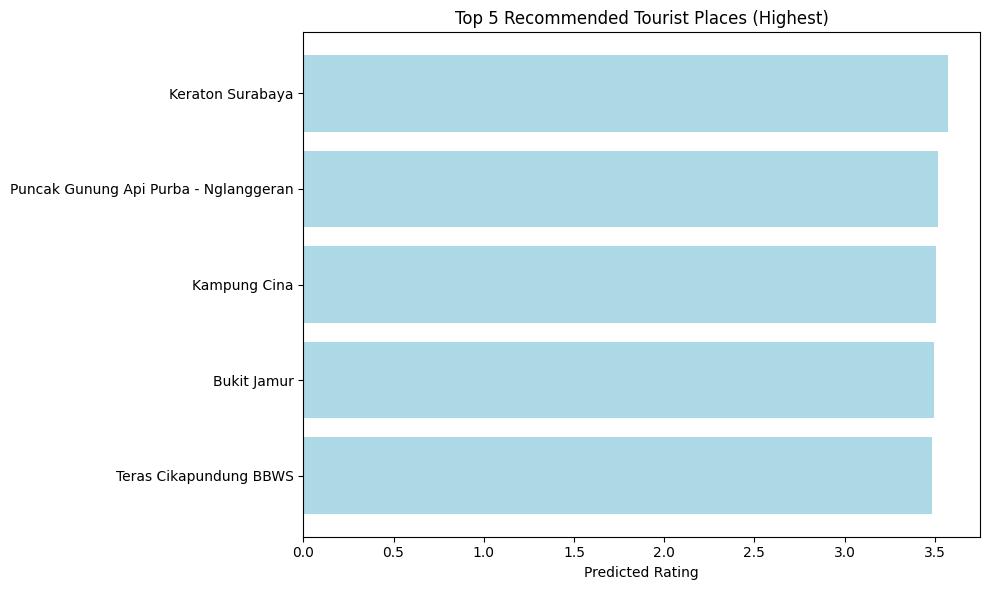

In [57]:
# Predict
cbf_full_predictions = cbf_model.predict(X_combined)

# Create DataFrame Prediction Result
recommendation_df = pd.DataFrame({
    'Place_Name': tourism_df['Place_Name'],
    'Predicted_Rating': cbf_full_predictions
})

# Sort based on Predicted Rating
recommendation_df_sorted = recommendation_df.sort_values(by='Predicted_Rating', ascending=False)

# Show 5 Recommended Tourist Places (Top 5)
print("Top 5 Recommended Tourist Places (Highest Predictions):")
top_5 = recommendation_df_sorted.nlargest(5, 'Predicted_Rating')
print(top_5)

# Visualization: Top 5 Recommended Places
plt.figure(figsize=(10, 6))
plt.barh(top_5['Place_Name'], top_5['Predicted_Rating'], color='lightblue')
plt.xlabel('Predicted Rating')
plt.title('Top 5 Recommended Tourist Places (Highest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Bottom 5 Recommended Tourist Places (Lowest Predictions):
            Place_Name  Predicted_Rating
103      Tebing Breksi          2.473497
208     Pantai Sanglen          2.555489
388       Brown Canyon          2.584051
233  Amazing Art World          2.588364
18            Kidzania          2.660475


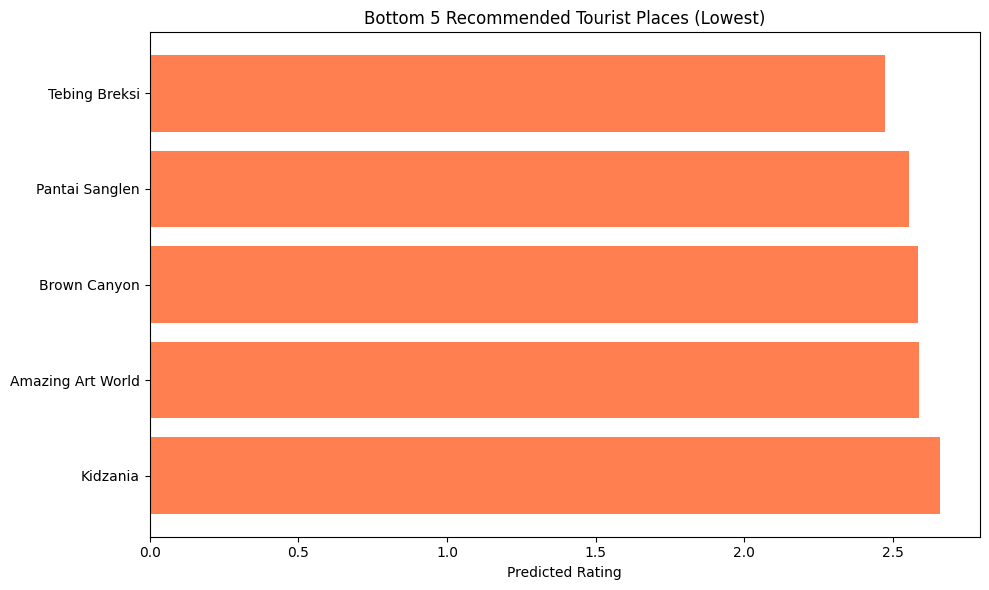

In [58]:
# Show 5 Recommended Tourist Places (Lowest Predictions)
print("\nBottom 5 Recommended Tourist Places (Lowest Predictions):")
bottom_5 = recommendation_df_sorted.nsmallest(5, 'Predicted_Rating')
print(bottom_5)


# Visualization: Bottom 5 Recommended Places
plt.figure(figsize=(10, 6))
plt.barh(bottom_5['Place_Name'], bottom_5['Predicted_Rating'], color='coral')
plt.xlabel('Predicted Rating')
plt.title('Bottom 5 Recommended Tourist Places (Lowest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

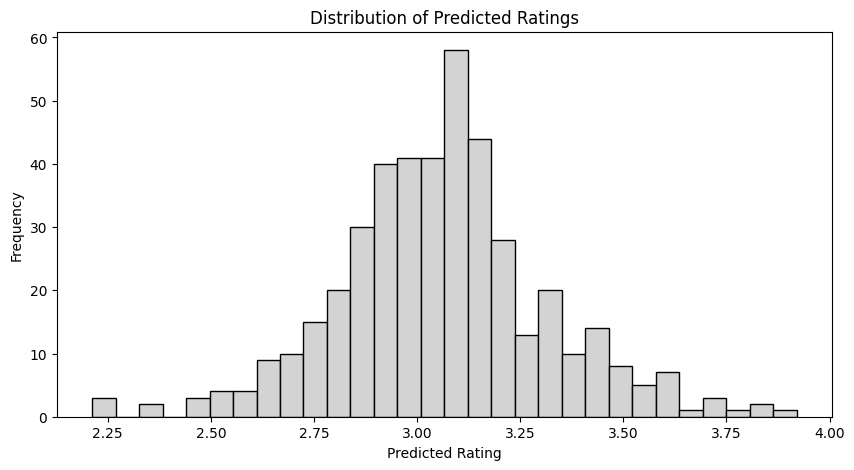

In [55]:
plt.figure(figsize=(10, 5))
plt.hist(recommendation_df['Predicted_Rating'], bins=30, color='lightgrey', edgecolor='black')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of predicted ratings, as shown in the histogram, is heavily centered around 3.0, with relatively few predictions at the extremes. This indicates the model's difficulty in differentiating between highly-rated and poorly-rated tourist places, leading to a clustering effect near the mean. Such behavior suggests potential issues like data sparsity, where limited rating data makes it hard to learn meaningful patterns. Additionally, the model's reliance on TF-IDF features may have resulted in shallow semantic understanding, causing it to overlook nuanced relationships between text descriptions and ratings. The uniformity also hints at potential over-reliance on average ratings during the hybrid process, which can cause the model to gravitate toward the mean. Improving performance might require more diverse features, better hyperparameter tuning, or more advanced techniques like embeddings or matrix factorization.